REGRESION MULTIVARIABLE

In [52]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

import pandas as pd

In [53]:
# Cargamos el dataset
data = pd.read_csv('kc_house_data.csv', delimiter=',')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [55]:
# modificaremos los años para tener una columna para estos y borraremos la columna id y date
d =[]
for i in data['date'].values:
    d.append(i[:4])
    
data['date'] = d

# convertir todo al mismo tipo de datos
for i in data.columns:
    data[i]=data[i].astype(float)

# hacer una nueva edad de columna de la casa
data['age'] = data['date'] - data['yr_built']

# calcular el total de años de renovación
data['renov_age'] = np.abs(data['yr_renovated'] - data['yr_built'])
data['renov_age'] = data.renov_age.apply(lambda x: x if len(str(int(x)))==2 else 0.0)

# eliminar columnas no deseadas como año_construido, fecha, identificación
data.drop(['id','date', 'yr_built', 'yr_renovated'], axis=1, inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renov_age
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,-1754.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,98125.0,47.7210,-122.319,1690.0,7639.0,-1750.0,40.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,-1732.0,0.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,98136.0,47.5208,-122.393,1360.0,5000.0,-1764.0,0.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,-1786.0,0.0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  float64
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  float64
 4   sqft_lot       21613 non-null  float64
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  float64
 7   view           21613 non-null  float64
 8   condition      21613 non-null  float64
 9   grade          21613 non-null  float64
 10  sqft_above     21613 non-null  float64
 11  sqft_basement  21613 non-null  float64
 12  zipcode        21613 non-null  float64
 13  lat            21613 non-null  float64
 14  long           21613 non-null  float64
 15  sqft_living15  21613 non-null  float64
 16  sqft_lot15     21613 non-null  float64
 17  age            21613 non-null  float64
 18  renov_

In [57]:
# Seleccionamos las columnas independientes (X) y dependiente(y)
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
m = y.size

In [58]:
print(X.head())

   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       3.0       1.00       1180.0    5650.0     1.0         0.0   0.0   
1       3.0       2.25       2570.0    7242.0     2.0         0.0   0.0   
2       2.0       1.00        770.0   10000.0     1.0         0.0   0.0   
3       4.0       3.00       1960.0    5000.0     1.0         0.0   0.0   
4       3.0       2.00       1680.0    8080.0     1.0         0.0   0.0   

   condition  grade  sqft_above  sqft_basement  zipcode      lat     long  \
0        3.0    7.0      1180.0            0.0  98178.0  47.5112 -122.257   
1        3.0    7.0      2170.0          400.0  98125.0  47.7210 -122.319   
2        3.0    6.0       770.0            0.0  98028.0  47.7379 -122.233   
3        5.0    7.0      1050.0          910.0  98136.0  47.5208 -122.393   
4        3.0    8.0      1680.0            0.0  98074.0  47.6168 -122.045   

   sqft_living15  sqft_lot15     age  renov_age  
0         1340.0      5650.0 -1754.0

In [59]:
display(data)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renov_age
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,-1754.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,98125.0,47.7210,-122.319,1690.0,7639.0,-1750.0,40.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,-1732.0,0.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,98136.0,47.5208,-122.393,1360.0,5000.0,-1764.0,0.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,-1786.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0,-1808.0,0.0
21609,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0,-1813.0,0.0
21610,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0,-1808.0,0.0
21611,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0,-1803.0,0.0


In [60]:
# Funcion de normalizacion de caracteristicas, para mejorar el rendimiento
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1]) # 8, [0,0,0,0,0,0,0,0]
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [61]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print('Media calculada:\n', mu)
print('Desviación estandar calculada:\n', sigma)
print(X_norm)

Media calculada:
 bedrooms             3.370842
bathrooms            2.114757
sqft_living       2079.899736
sqft_lot         15106.967566
floors               1.494309
waterfront           0.007542
view                 0.234303
condition            3.409430
grade                7.656873
sqft_above        1788.390691
sqft_basement      291.509045
zipcode          98077.939805
lat                 47.560053
long              -122.213896
sqft_living15     1986.552492
sqft_lot15       12768.455652
age              -1770.005136
renov_age            2.184380
dtype: float64
Desviación estandar calculada:
 bedrooms             0.930040
bathrooms            0.770145
sqft_living        918.419649
sqft_lot         41419.553273
floors               0.539976
waterfront           0.086515
view                 0.766300
condition            0.650728
grade                1.175432
sqft_above         828.071820
sqft_basement      442.564804
zipcode             53.503788
lat                  0.138561
long 

In [62]:
# añadimos una columna de unos como primera columna en X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [63]:
# Funcion del costo, uso del error cuadratico medio, calcula la diferencia entre predicciones y valores reales
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [64]:
# Funcion descenso de la gradiente, ajusta los parametros del modelo de regresion
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

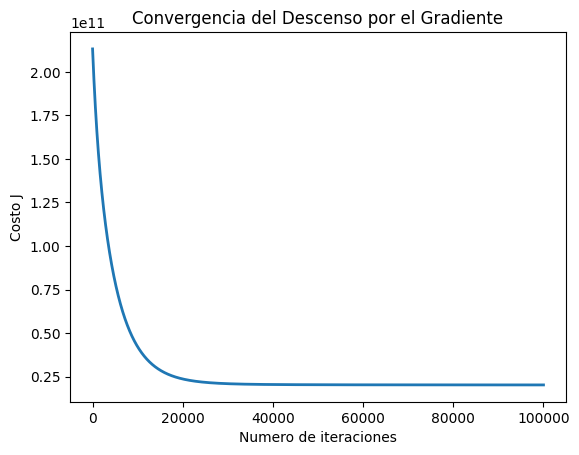

theta calculado por el descenso por el gradiente: [540063.63406056 -32539.17431062  30862.66663982  80933.99579114
   5682.33037104   4232.67921357  50732.15993025  40349.25816359
  18153.01889102 108593.44125965  75340.81408245  26987.61148644
 -30179.60369562  83841.12630934 -31235.76878072  20289.90048823
 -10417.01317249  74107.28875193   8580.1724864 ]
Prueba de prediccion: $207787


In [65]:
# Elegir algun valor para alpha
alpha = 0.0001
num_iters = 100000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(19)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del Descenso por el Gradiente')
pyplot.show()

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
X_array = [1,3,1,1180,5650,1,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,-1754.0,0.0]
X_array[1:19] = (X_array[1:19] - mu) / sigma
Precio = np.dot(X_array, theta)

print('Prueba de prediccion: ${:.0f}'.format(Precio))

In [66]:
X_array = [1,3,1,1180,5650,1,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,-1754.0,0.0]
X_array[1:19] = (X_array[1:19] - mu) / sigma

In [67]:
# imprimimos los datos normalizados de X_array
X_array[1:19]

[-0.3987371485515761,
 -1.4474635685648216,
 -0.9798350208148431,
 -0.22832133180119432,
 -0.9154270041565511,
 -0.08717263102067989,
 -0.30575946383494007,
 -0.6291868725550974,
 -0.5588357490736213,
 -0.7347076376179391,
 -0.6586810403679764,
 1.8701515941084972,
 -0.35257174794299895,
 -0.30607895777587113,
 -0.9433551980508941,
 -0.26071540817101096,
 0.5448977711453652,
 -0.1892735222644082]

ECUACION DE LA NORMAL

In [80]:
# Cargar datos
import pandas as pd
import numpy as np
data = pd.read_csv('kc_house_data.csv', delimiter=',')

In [81]:
display(data)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [82]:
# modificaremos los años para tener una columna para estos y borraremos la columna id y date
d =[]
for i in data['date'].values:
    d.append(i[:4])
    
data['date'] = d

# convertir todo al mismo tipo de datos
for i in data.columns:
    data[i]=data[i].astype(float)

# hacer una nueva edad de columna de la casa
data['age'] = data['date'] - data['yr_built']

# calcular el total de años de renovación
data['renov_age'] = np.abs(data['yr_renovated'] - data['yr_built'])
data['renov_age'] = data.renov_age.apply(lambda x: x if len(str(int(x)))==2 else 0.0)

# eliminar columnas no deseadas como año_construido, fecha, identificación
data.drop(['id','date', 'yr_built', 'yr_renovated'], axis=1, inplace=True)
display(data)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renov_age
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,-1754.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,98125.0,47.7210,-122.319,1690.0,7639.0,-1750.0,40.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,-1732.0,0.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,98136.0,47.5208,-122.393,1360.0,5000.0,-1764.0,0.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,-1786.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0,-1808.0,0.0
21609,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0,-1813.0,0.0
21610,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0,-1808.0,0.0
21611,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0,-1803.0,0.0


In [83]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
m = y.size

In [84]:
print(X.head())

   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       3.0       1.00       1180.0    5650.0     1.0         0.0   0.0   
1       3.0       2.25       2570.0    7242.0     2.0         0.0   0.0   
2       2.0       1.00        770.0   10000.0     1.0         0.0   0.0   
3       4.0       3.00       1960.0    5000.0     1.0         0.0   0.0   
4       3.0       2.00       1680.0    8080.0     1.0         0.0   0.0   

   condition  grade  sqft_above  sqft_basement  zipcode      lat     long  \
0        3.0    7.0      1180.0            0.0  98178.0  47.5112 -122.257   
1        3.0    7.0      2170.0          400.0  98125.0  47.7210 -122.319   
2        3.0    6.0       770.0            0.0  98028.0  47.7379 -122.233   
3        5.0    7.0      1050.0          910.0  98136.0  47.5208 -122.393   
4        3.0    8.0      1680.0            0.0  98074.0  47.6168 -122.045   

   sqft_living15  sqft_lot15     age  renov_age  
0         1340.0      5650.0 -1754.0

In [85]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [86]:
# Funcion de la ecuacion de la normal, obtenemos valores optimos 
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [87]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y)

# Muestra los resultados obtenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)))
X_array = [1,3,1,1180,5650,1,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,-1754.0,0.0]
price = np.dot(X_array, theta) 

print('Precio predecido para una casa (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 1.56522161e+06  3.21488188e+06 -1.91301751e+06 -3.20040942e+04
  1.06559500e-01  8.16759402e+05  6.90229056e+06  7.63637617e+05
  7.07070962e+04 -1.85612705e+05  3.23904844e+04  3.23957614e+04
 -5.82760437e+02  6.02762204e+05 -2.14784752e+05  2.16275877e+01
 -3.82024867e-01  2.62161207e+03  6.52277810e+02]
Precio predecido para una casa (usando la ecuación de la normal): $2594140


REGRESION POLINOMIAL

In [ ]:
# Cargar datos
data = pd.read_csv('kc_house_data.csv', delimiter=",") # skiprows=1
data = data.drop(data.iloc[:,0:2].columns, axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [ ]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
m = y.size

In [ ]:
print(X)
print(y)
print(m)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21608         3       2.50         1530      1131     3.0           0     0   
21609         4       2.50         2310      5813     2.0           0     0   
21610         2       0.75         1020      1350     2.0           0     0   
21611         3       2.50         1600      2388     2.0           0     0   
21612         2       0.75         1020      1076     2.0           0     0   

       condition  grade  sqft_above  sqft_basement 

In [ ]:
X = np.concatenate([X, X * X], axis=1)

In [ ]:
print(X)

[[3.00000000e+00 1.00000000e+00 1.18000000e+03 ... 1.49467740e+04
  1.79560000e+06 3.19225000e+07]
 [3.00000000e+00 2.25000000e+00 2.57000000e+03 ... 1.49619378e+04
  2.85610000e+06 5.83543210e+07]
 [2.00000000e+00 1.00000000e+00 7.70000000e+02 ... 1.49409063e+04
  7.39840000e+06 6.49958440e+07]
 ...
 [2.00000000e+00 7.50000000e-01 1.02000000e+03 ... 1.49570454e+04
  1.04040000e+06 4.02804900e+06]
 [3.00000000e+00 2.50000000e+00 1.60000000e+03 ... 1.49008408e+04
  1.98810000e+06 1.65636900e+06]
 [2.00000000e+00 7.50000000e-01 1.02000000e+03 ... 1.49570454e+04
  1.04040000e+06 1.84144900e+06]]


In [ ]:
num_filas, num_columnas = X.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 21613
Número de columnas: 36


In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[3.00000000e+00 1.00000000e+00 1.18000000e+03 ... 1.49467740e+04
  1.79560000e+06 3.19225000e+07]
 [3.00000000e+00 2.25000000e+00 2.57000000e+03 ... 1.49619378e+04
  2.85610000e+06 5.83543210e+07]
 [2.00000000e+00 1.00000000e+00 7.70000000e+02 ... 1.49409063e+04
  7.39840000e+06 6.49958440e+07]
 ...
 [2.00000000e+00 7.50000000e-01 1.02000000e+03 ... 1.49570454e+04
  1.04040000e+06 4.02804900e+06]
 [3.00000000e+00 2.50000000e+00 1.60000000e+03 ... 1.49008408e+04
  1.98810000e+06 1.65636900e+06]
 [2.00000000e+00 7.50000000e-01 1.02000000e+03 ... 1.49570454e+04
  1.04040000e+06 1.84144900e+06]]
Media calculada: [ 3.37084162e+00  2.11475732e+00  2.07989974e+03  1.51069676e+04
  1.49430898e+00  7.54175728e-03  2.34303428e-01  3.40942951e+00
  7.65687318e+00  1.78839069e+03  2.91509045e+02  1.97100514e+03
  8.44022579e+01  9.80779398e+04  4.75600525e+01 -1.22213896e+02
  1.98655249e+03  1.27684557e+04  1.22275482e+01  5.06532238e+00
  5.16947757e+06  1.94379986e+09  2.52453385e+00  7.541757

In [ ]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
print(X)

[[ 1.         -0.39873715 -1.44746357 ...  0.30571255 -0.78856184
  -0.08982032]
 [ 1.         -0.39873715  0.1756067  ...  0.74646654 -0.46943947
  -0.08711198]
 [ 1.         -1.47395936 -1.44746357 ...  0.1351581   0.89741533
  -0.08643145]
 ...
 [ 1.         -1.47395936 -1.77207762 ...  0.60426342 -1.01581427
  -0.09267852]
 [ 1.         -0.39873715  0.50022075 ... -1.02940117 -0.73063533
  -0.09292154]
 [ 1.         -1.47395936 -1.77207762 ...  0.60426342 -1.01581427
  -0.09290257]]


In [ ]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J


In [ ]:
def gradientDescentPoly(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

In [ ]:
num_filas, num_columnas = X.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 21613
Número de columnas: 37


theta calculado por el descenso por el gradiente: [ 5.40063744e+05 -2.32774192e+04 -4.64879989e+03  6.50441153e+03
 -3.05467013e+03  2.52409218e+03  2.30482177e+04  1.88278073e+04
  9.28943075e+03  4.45037289e+04  2.00109792e+03  9.75388582e+03
 -3.52398515e+04  5.10587352e+03 -1.60591873e+04  4.14865350e+04
 -1.34478089e+04  5.21899082e+03 -9.55013082e+03  5.84323684e+03
  4.24184278e+04  8.22326404e+04  7.18307618e+03  7.71433401e+03
  2.30482177e+04  2.03522163e+04  1.23277292e+04  7.57871988e+04
  4.52755143e+04  8.67220013e+03 -3.41898861e+04  5.96894124e+03
 -1.60528531e+04  4.09273672e+04  1.34804743e+04  2.00306525e+04
  1.82574725e+02]
Precio predecido de una casa (usando el descenso por el gradiente): $235982


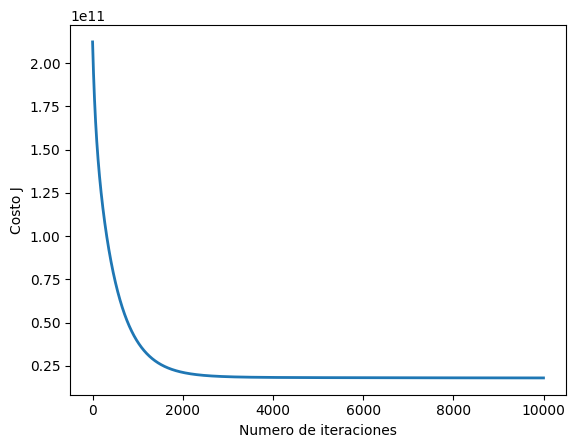

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(37)
theta, J_history = gradientDescentPoly(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [1,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,
           9,1,1392400,31922500,1,0,0,9,49,1392400,0,3822025,0,9638919684,2257.31412544,14946.774049,1795600,31922500]
X_array[1:37] = (X_array[1:37] - mu) / sigma
precio = np.dot(X_array, theta)

print('Precio predecido de una casa (usando el descenso por el gradiente): ${:.0f}'.format(precio))

In [ ]:
X_array = [1,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,
           9,1,1392400,31922500,1,0,0,9,49,1392400,0,3822025,0,9638919684,2257.31412544,14946.774049,1795600,31922500]
X_array[1:37] = (X_array[1:37] - mu) / sigma

In [ ]:
X_array[1:37]
print(np.dot(X_array, theta))

235982.10533028093
